# [GD-4] Multiclass Classification
## 프로젝트: Vocabulary Size를 변경해서 시도해보기
### 학습 목표
* 로이터 뉴스 데이터 이해하기
* F1-score와 confusion matrix 출력해보기
* 여러 머신러닝 모델에 대해서 성능 비교해보기
* 단어 수에 따른 성능 비교해보기

### 목차
#### 1. 들어가며         
  1-1. 데이터 준비         
#### 2. 프로젝트         
  2-1. 모든 단어 사용         
  2-2. 벡터화 하기         
  2-3. 모델 학습         
  2-4. 단어 5000개 사용         
  2-5. 단어 10000개 사용         
  2-6. 딥러닝 모델과 비교해 보기         

#### 3. 회고
  3-1. 최종 정리         
  3-2. 참고사이트         


### 루브릭 평가 기준
|평가문항|상세기준|
|:---|:---|
|1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?|3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.|
|2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?|Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.|
|3. 딥러닝 모델을 활용해 성능이 비교 및 확인되었는가?|동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.|   
<br/>

----


### 1. 들어가며


### 1-1. 데이터 준비
#### Google Drive Connect

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 라이브러리 버전 확인


In [ ]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt


print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.8.0
3.2.2
0.11.2
1.21.5
1.3.5
1.0.2


### 1-2. 모든 단어 사용

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [ ]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


#### 데이터 분포 확인해보기

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


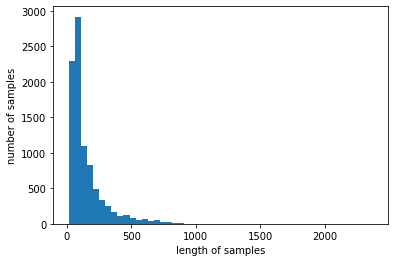

In [ ]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 원본 뉴스 데이터로 복원하기

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

#### 정수로부터 단어를 얻을 수 있는 index_to_word 함수 생성

In [ ]:
index_to_word = { index+3 : word for word, index in word_index.items() }

#### index_to_word 확인하기

In [ ]:
print(index_to_word[4])
print(index_to_word[16])

the
it


#### index_to_word에 맵핑되어 저장된 번호를 진짜 index 로 만들기 

In [ ]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

#### 첫번째 훈련용 뉴스 기사를 원래 텍스트로 복원하기

In [ ]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
x_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
word_index['rentcorp']

28839

#### 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [ ]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


#### 각각 5개씩 제대로 잘 변환되었는지 확인해보기

In [ ]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [ ]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

### 1-3. 벡터화 하기

#### 필요한 도구 import

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### DTM을 생성 & 크기 확인

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


#### TF-IDF 행렬 생성 & 크기 확인

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


### 1-4. 모델 학습


#### 라이브러리 불러오기
* 나이브 베이즈 분류기
* 로지스틱 회귀
* Complement Naive Bayes Classifier, CNB
* 결정 트리
* 랜덤 포레스트
* 그라디언트 부스팅
* 보팅
* 선형 SVC


In [ ]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산


#### 테스트 데이터를 TF-IDF 행렬로 변환
* 테스트 데이터에 대한 정확도를 측정하기 위해서 훈련 데이터와 동일한 전처리 해야함
* ```predict()``` 함수를 통해 예측값을 얻어 정확도 측정

In [ ]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

#### 나이브 베이즈 분류기
* 사이킷런의  ```MultinomialNB()``` 을 통해 사용 가능

#### 훈련 데이터와 해당 훈련 데이터에 대한 레이블을 인자로 사용하여 학습

In [ ]:
nb = MultinomialNB()
nb.fit(tfidfv, y_train)

nb_predicted = nb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("나이브 베이즈 정확도:", accuracy_score(y_test, nb_predicted)) #예측값과 실제값 비교

나이브 베이즈 정확도: 0.5997328584149599


#### Complement Naive Bayes Classifier(CNB)
* 데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기
* 나이브 베이즈 분류기보다 일반적으로 성능이 더 좋음

In [ ]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("CNB 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교

CNB 정확도: 0.7649154051647373


#### 로지스틱 회귀(Logistic Regression)

In [ ]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교

정확도: 0.813446126447017


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("선형 서포트 벡터 머신 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교

선형 서포트 벡터 머신 정확도: 0.7880676758682101


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### 결정 트리(Decision Tree)

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교

결정 트리 정확도: 0.6211041852181657


#### 랜덤 포레스트(Random Forest)

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교

랜덤 포레스트 정확도: 0.6544968833481746


#### 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [ ]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교

그래디언트 부스팅 트리 정확도: 0.7702582368655387


#### 보팅(Voting)

In [ ]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

voting_classifier_predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("보팅 정확도:", accuracy_score(y_test, voting_classifier_predicted)) #예측값과 실제값 비교


보팅 정확도: 0.8187889581478184


#### 각 모델에 대한 전체 훈련 함수 생성

In [ ]:
def train_ml(tfidfv, y_train, tfidfv_test, y_test):
  # 나이브 베이즈 분류기
  nb = MultinomialNB()
  nb.fit(tfidfv, y_train)

  nb_predicted = nb.predict(tfidfv_test) #테스트 데이터에 대한 예측
  print("나이브 베이즈 정확도:", accuracy_score(y_test, nb_predicted)) #예측값과 실제값 비교

  # CNB
  cb = ComplementNB()
  cb.fit(tfidfv, y_train)

  cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
  print("CNB 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교

  # 로지스틱 회귀
  lr = LogisticRegression(C=10000, penalty='l2')
  lr.fit(tfidfv, y_train)

  lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
  print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교

  # 선형 서포트 벡터 머신
  lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
  lsvc.fit(tfidfv, y_train)

  lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
  print("선형 서포트 벡터 머신 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교

  # 결정 트리
  tree = DecisionTreeClassifier(max_depth=10, random_state=0)
  tree.fit(tfidfv, y_train)

  tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
  print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교

  # 랜덤 포레스트
  forest = RandomForestClassifier(n_estimators=5, random_state=0)
  forest.fit(tfidfv, y_train)

  forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
  print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교

  # 그래디언트 부스팅 트리
  grbt = GradientBoostingClassifier(random_state=0) # verbose=3
  grbt.fit(tfidfv, y_train)

  grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
  print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교

  # 보팅
  voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
        ], voting='soft', n_jobs=-1)
  voting_classifier.fit(tfidfv, y_train)

  voting_classifier_predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
  print("보팅 정확도:", accuracy_score(y_test, voting_classifier_predicted)) #예측값과 실제값 비교

  return nb, cb, lr, lsvc, tree, forest, grbt, voting_classifier

### 1-5. 단어 5000개 사용

In [ ]:
(x_train_5k, y_train_5k), (x_test_5k, y_test_5k) = reuters.load_data(num_words=5000, test_split=0.2)

#### 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [ ]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train_5k[i]])
    decoded.append(t)

x_train_5k = decoded
print(len(x_train_5k))

8982


In [ ]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test_5k[i]])
    decoded.append(t)

x_test_5k = decoded
print(len(x_test_5k))

2246


#### 행렬 변환

#### DTM을 생성 & 크기 확인

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm_5k = dtmvector.fit_transform(x_train_5k)
print(x_train_dtm_5k.shape)

(8982, 4867)


#### TF-IDF 행렬 생성 & 크기 확인

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv_5k = tfidf_transformer.fit_transform(x_train_dtm_5k)
print(tfidfv_5k.shape)

(8982, 4867)


#### 테스트 데이터를 TF-IDF 행렬로 변환
* 테스트 데이터에 대한 정확도를 측정하기 위해서 훈련 데이터와 동일한 전처리 해야함
* ```predict()``` 함수를 통해 예측값을 얻어 정확도 측정

In [ ]:
x_test_dtm_5k = dtmvector.transform(x_test_5k) #테스트 데이터를 DTM으로 변환
tfidfv_test_5k = tfidf_transformer.transform(x_test_dtm_5k) #DTM을 TF-IDF 행렬로 변환

In [ ]:
import time
start = time.time() 

nb_5k, cb_5k, lr_5k, lsvc_5k, tree_5k, forest_5k, grbt_5k, voting_classifier_5k = train_ml(tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)

print("time :", time.time() - start)

나이브 베이즈 정확도: 0.6731967943009796
CNB 정확도: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8058771148708815


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


선형 서포트 벡터 머신 정확도: 0.7756010685663401
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.701246660730187
그래디언트 부스팅 트리 정확도: 0.767586821015138
보팅 정확도: 0.8161175422974176
time : 2155.589465856552


### 1-6. 단어 10000개 사용

In [ ]:
(x_train_10k, y_train_10k), (x_test_10k, y_test_10k) = reuters.load_data(num_words=10000, test_split=0.2)

#### 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [ ]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train_10k[i]])
    decoded.append(t)

x_train_10k = decoded
print(len(x_train_10k))

8982


In [ ]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test_10k[i]])
    decoded.append(t)

x_test_10k = decoded
print(len(x_test_10k))

2246


#### 행렬 변환

#### DTM을 생성 & 크기 확인

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm_10k = dtmvector.fit_transform(x_train_10k)
print(x_train_dtm_10k.shape)

(8982, 9670)


#### TF-IDF 행렬 생성 & 크기 확인

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv_10k = tfidf_transformer.fit_transform(x_train_dtm_10k)
print(tfidfv_10k.shape)

(8982, 9670)


#### 테스트 데이터를 TF-IDF 행렬로 변환
* 테스트 데이터에 대한 정확도를 측정하기 위해서 훈련 데이터와 동일한 전처리 해야함
* ```predict()``` 함수를 통해 예측값을 얻어 정확도 측정

In [ ]:
x_test_dtm_10k = dtmvector.transform(x_test_10k) #테스트 데이터를 DTM으로 변환
tfidfv_test_10k = tfidf_transformer.transform(x_test_dtm_10k) #DTM을 TF-IDF 행렬로 변환

In [ ]:
import time
start = time.time() 

nb_10k, cb_10k, lr_10k, lsvc_10k, tree_10k, forest_10k, grbt_10k, voting_classifier_10k = train_ml(tfidfv_10k, y_train_10k, tfidfv_test_10k, y_test_10k)

print("time :", time.time() - start)

나이브 베이즈 정확도: 0.6567230632235085
CNB 정확도: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8076580587711487


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


선형 서포트 벡터 머신 정확도: 0.7791629563668745
결정 트리 정확도: 0.6202137132680321
랜덤 포레스트 정확도: 0.674087266251113
그래디언트 부스팅 트리 정확도: 0.7662511130899377
보팅 정확도: 0.8116651825467498
time : 2220.990444421768


#### 정확도 확인

In [ ]:
bayse = [0.5997328584149599, 0.6731967943009796, 0.6567230632235085]
cnb = [0.7649154051647373, 0.7707034728406055, 0.7707034728406055]
logistic = [0.813446126447017, 0.8058771148708815, 0.8076580587711487]
svm = [0.7880676758682101, 0.7756010685663401, 0.7791629563668745]
tree = [0.6211041852181657, 0.6179875333926982, 0.6202137132680321]
rf = [0.6544968833481746, 0.701246660730187, 0.674087266251113]
gbs = [0.7702582368655387, 0.767586821015138, 0.7662511130899377]
voting = [0.8187889581478184, 0.8161175422974176, 0.8116651825467498]

vocab_size_list = ['whole', '5k', '10k']
model_list = [bayse, cnb, logistic, svm, tree, rf, gbs, voting]

In [ ]:
acc_dict = {}
for idx, vs in enumerate(vocab_size_list):
    acc_list = []
    for model in model_list:
        acc_list.append(model[idx])
    acc_dict[vs] = sum(acc_list)/len(model_list)

In [ ]:
acc_dict

{'10k': 0.7358081032947462,
 '5k': 0.741039626001781,
 'whole': 0.7288512911843277}


### 2-6. 딥러닝 모델과 비교해 보기


In [ ]:
from tensorflow import keras

vocab_size = 10000
word_vector_dim = 32  

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim))
model_LSTM.add(keras.layers.LSTM(32))
# model_LSTM.add(keras.layers.Dense(128, activation='relu'))  
model_LSTM.add(keras.layers.Dense(num_classes, activation='softmax'))  

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 46)                1518      
                                                                 
Total params: 329,838
Trainable params: 329,838
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tfidfv_10k.shape, y_train_10k.shape

((8982, 9670), (8982,))

#### 학습 데이터 실험
**sparse한 행렬을 dense하게 만들기 위해 두가지 변환으로 실험**
* toarray() : array로 변환(에러메세지에서 추천하는 방법)
* todense() : Return a dense matrix representation of this matrix.

In [ ]:
tfidfv_10k_arr = tfidfv_10k.toarray()
tfidfv_10k_dense = tfidfv_10k.todense()

In [ ]:
tfidfv_test_10k_arr = tfidfv_test_10k.toarray()
tfidfv_test_10k_dense = tfidfv_test_10k.todense()

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

model_LSTM.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            
epochs=20
batch_size=64


history_LSTM = model_LSTM.fit(tfidfv_10k_arr,
                                y_train_10k,
                                epochs=epochs,
                                batch_size=batch_size,
                                callbacks=[es],
                                validation_split=0.2,
                                verbose=1)

Epoch 1/20
 28/113 [======>.......................] - ETA: 16:50 - loss: 3.5075 - accuracy: 0.3198

KeyboardInterrupt: ignored

## 3. 회고

### 3-1. 최종 정리
* 너무 늦게 시작하게되서 아쉬운 프로젝트였다. 😂 좀 더 시간갖고 찬찬히 살펴보며 딥러닝 모델 비교까지 해봐야겠다. 
* 단어 개수별로 훈련시키고 다양한 모델을 사용하는게 재미있었다. 
* 아직까지도 프로젝트 진행이 많이 어렵지만 조금씩 하나씩 알아가는 재미는 느끼고 있으니! 지치지않고 끝까지 해나가는데 목표를 두어야겠다.   
* Colab 으로 진행한 첫 Going Deeper!       
<br/>
<br/>

### 3-2. 참고사이트
* 문서 단어 행렬(Document-Term Matrix, DTM)   
  https://wikidocs.net/24559 

* NumPy와 SciPy - .todense()와 .toarray() 사이의 차이점      
  https://code-examples.net/ko/q/1d01f37     

* 깃허브    
  https://github.com/miinkang/AI_Project_AIFFEL/blob/main/%5BGD-04%5DTFIDF_vectorization.ipynb


        
  
